In [1]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import os

In [2]:
import plotly.io as pio
import plotly.graph_objs as go
from plotly.subplots import make_subplots
pio.templates.default = "simple_white"
template = "simple_white"

In [3]:
layout = go.Layout(
    height = 500, width = 800,
    xaxis = dict(
        zeroline=True, zerolinecolor='#002c75', title_font_size=24, tickfont_size=20,
    ),
    yaxis = dict(
        zeroline=True, zerolinecolor='#002c75', title_font_size=24, tickfont_size=20,
    ),
    legend = dict(
        font = dict(size=20, color='black'),
        bgcolor = "rgba(5,5,25,0.1)",
        bordercolor="black",
        borderwidth=1
    )
)

In [37]:
names = ["1.npy", "2.npy", "3.npy", "4.npy"]

scores = np.block([np.load(f"scores/{filename}") for filename in names])
parameters = np.block([np.load(f"parameters/{filename}").T for filename in names]).T

In [38]:
scores.shape

(400,)

In [39]:
parameters.shape

(400, 7)

In [40]:
good = scores > 0.5

In [41]:
# parameters = np.concatenate((parameters, scores.reshape(1, -1).T), axis=1)

In [42]:
parameters_tsne = TSNE(2).fit_transform(parameters)[good]
pca = PCA(2).fit(parameters)
parameters_pca = pca.transform(parameters)[good]

In [43]:
parameters_tsne.shape

(392, 2)

In [44]:
parameters_pca.shape

(392, 2)

In [45]:

# scores = scores[good]
# parameters = parameters[good]

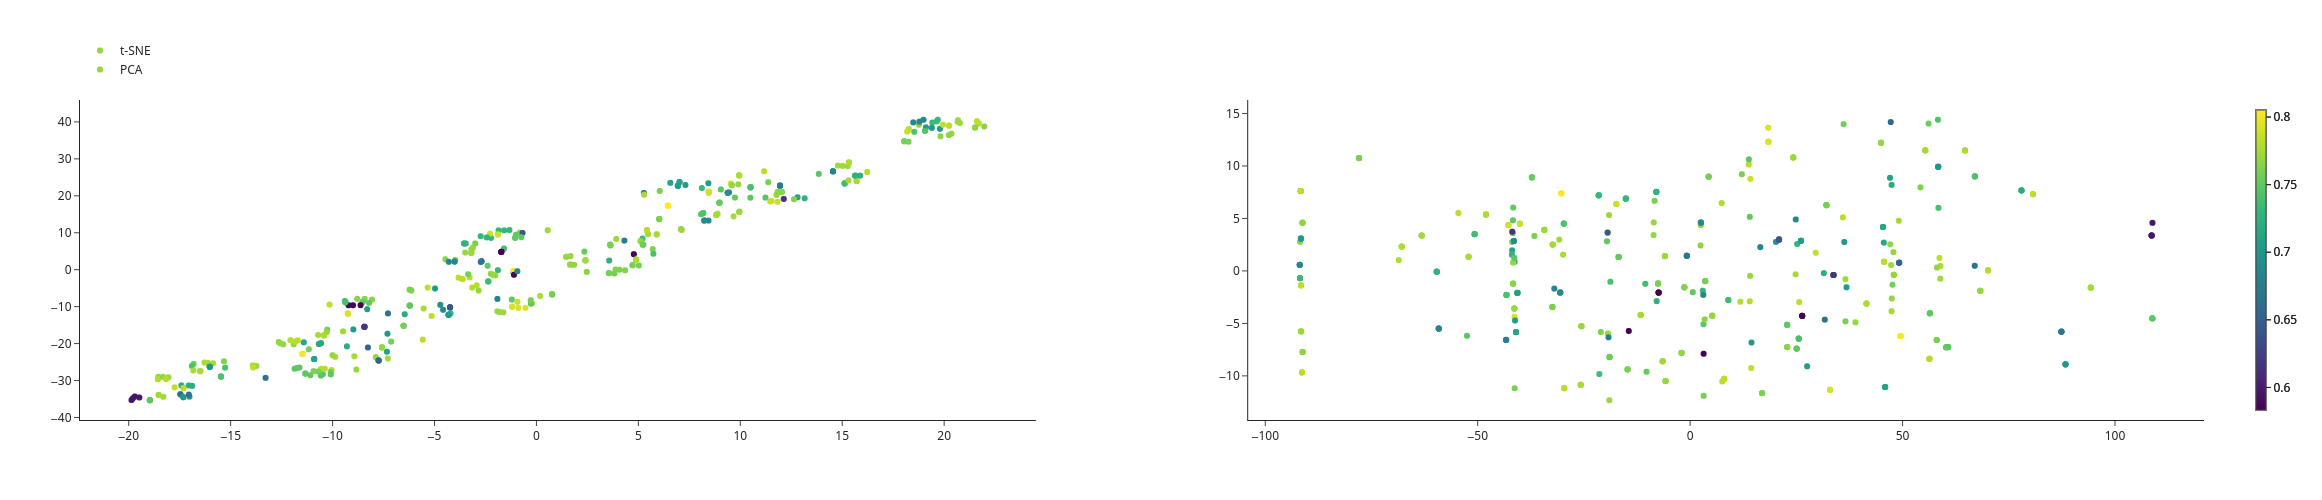

In [46]:
fig = make_subplots(rows=1, cols=2)
# fig.update_layout(layout)
fig.add_scatter(
    x=parameters_tsne[:, 0], y=parameters_tsne[:, 1], marker=dict(color=scores[good], colorscale='Viridis', colorbar=dict(thickness=10)), name="t-SNE",
    mode="markers", row=1, col=1
)
fig.add_scatter(
    x=parameters_pca[:, 0], y=parameters_pca[:, 1], marker=dict(color=scores[good], colorscale='Viridis', colorbar=dict(thickness=10)), name="PCA",
    mode="markers", row=1, col=2
)
fig.update_layout(height=500, width=1000, legend_x=0, legend_y=1.2)

In [47]:
pca.components_[0]

array([ 5.57651358e-04, -9.98967812e-01,  4.02150284e-02,  2.07148023e-02,
        4.05354767e-03, -4.65366529e-04, -1.19358830e-05])

In [48]:
pca.components_[1]

array([-5.49884331e-03, -1.94174061e-02, -7.95088031e-01,  6.06041564e-01,
        7.51180631e-03,  9.21572503e-03,  1.22202463e-04])

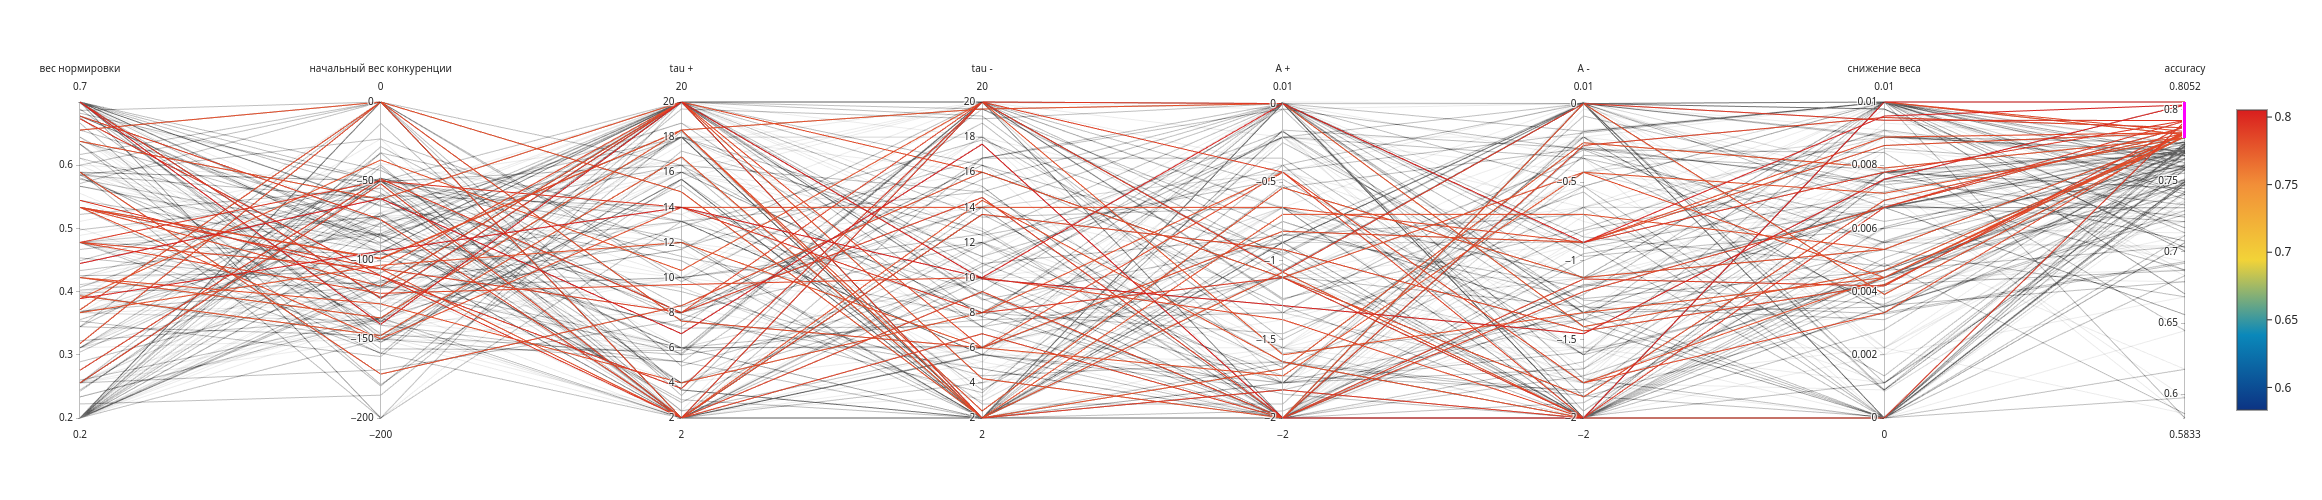

In [49]:
names = ["вес нормировки", "начальный вес конкуренции", "tau +", "tau -", "A +", "A -", "снижение веса"]

fig = go.Figure(data=
    go.Parcoords(
        line = dict(color = scores[good],
                   colorscale = 'portland',
                   showscale = True),
        dimensions = [
            dict(
                label=names[i],
                values = parameters[:, i][good], range=(parameters[:, i].min(), parameters[:, i].max())) for i in range(parameters.shape[1])
        ] + [dict(label="accuracy", values=scores[good], constraintrange=[0.78, max(scores)])]
    )
)
fig.update_layout(height=500, width=1200)

In [50]:
scores.max()

0.8052

0.08569784560127455

In [41]:
b = a_.copy()

In [42]:
b[worse] = a[worse]

In [43]:
print(a.mean(), a_.mean(), b.mean())

0.417213 0.496984 0.59059


In [52]:
from evolution import DifferentialEvolution, BOUNDS

In [53]:
df = DifferentialEvolution(func=None, population=np.load("parameters/0_.npy"), bounds=BOUNDS)

In [54]:
df.old_population = np.load("parameters/4.npy")
df.population = np.load("parameters/5.npy")
df.old_scores = np.load("scores/4.npy")
df.scores = np.load("scores/5.npy")

In [156]:
df.selection()

In [55]:
df.scores.mean()

0.7591279999999999

In [56]:
df.convergence

0.03621948036952905

In [113]:
np.save("parameters/2_.npy", df.population)

In [63]:
print(df.scores.mean())

0.7362089999999999


In [64]:
np.save("parameters/1.npy", df.population)

In [65]:
np.save("scores/1.npy", df.scores)

In [203]:
for i in range(4):
    print(np.load(f"scores/{i}.npy").mean(), np.load(f"scores/{i}_.npy").mean(), np.load(f"scores/{i+1}.npy").mean())

0.688142 0.63866 0.7362089999999999
0.7362089999999999 0.593889 0.737521
0.737521 0.525458 0.737521
0.737521 0.417213 0.737762


In [66]:
df.new_generation()

In [68]:
np.save("parameters/1_.npy", df.population)